<a href="https://colab.research.google.com/github/rmfpdlxmtidl/MachineLearningAssignments/blob/master/Assignment_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Plot the average image [5pt]
- plot the average images of the same label for each digit


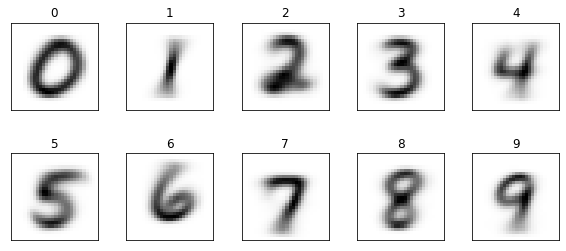

2. Present the output of the neural network with random weights [9pt]
- present the average of the output of the neural network using a logistic unit for the images of the same label for each digit


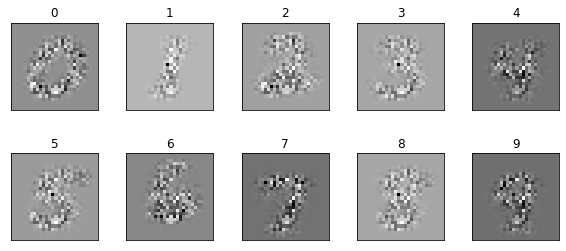

In [59]:
import matplotlib.pyplot as plt
import numpy as np


# load the data file ('mnist_test.csv')
file_data = "drive/My Drive/Colab Notebooks/Machine Learning/Assignment 08/mnist_test.csv"
handle_file = open(file_data, "r")
data = handle_file.readlines()
handle_file.close()

size_row = 28  # height of a image
size_col = 28  # width of a image
image_count = len(data)  # total number of images

# make a matrix each row of which represents an images in a vector form 
labels = np.empty(image_count, dtype=int)
images = np.empty((image_count, size_row * size_col), dtype=float)

# list of the averages of images
images_grouped_by_number = [np.zeros(size_row * size_col, dtype=float) for i in range(10)]
images_grouped_by_number2 = [np.zeros(size_row * size_col, dtype=float) for i in range(10)]
images_grouped_by_number_count = [0 for x in range(10)]

# the weights of the fully connected layer are given by random numbers sampled from the Normal distribution N(0,1) with mean 0 and standard deviation 1
np.random.seed(seed=100)
weights = np.random.normal(0, 1, size=size_row * size_col)

for index, line in enumerate(data):
  # each row of the data consists of the label and the image pixel values in a vector form
  # the label is one of the 10 digits from 0 to 9
  # the image represents one of the 10 digits from 0 to 9 in grey scale and its size is 28x28
  label_image = line.split(',')
  label = label_image[0]
  image_vector = np.asfarray(label_image[1:])

  images_grouped_by_number_count[int(label)] += 1

  # take the arithmatic average of the image data with the same label for each digit
  images_grouped_by_number[int(label)] += image_vector
  # consider a neural network with a fully connected layer using a logistic unit without a bias
  # compute the forward propagation
  images_grouped_by_number2[int(label)] += weights * image_vector
  
for i in range(len(images_grouped_by_number)):
  # take the arithmatic average of the image data with the same label for each digit
  images_grouped_by_number[i] /= images_grouped_by_number_count[i]
  # take the average of the output values for the images of the same label
  images_grouped_by_number2[i] /= images_grouped_by_number_count[i]

# 1. Plot the average image [5pt]
print('1. Plot the average image [5pt]')
print('- plot the average images of the same label for each digit')
plt.figure(figsize=(10, 4))

for label, image_vector in enumerate(images_grouped_by_number):
  image_matrix = image_vector.reshape((size_row, size_col))

  # arrange the subplots in 2x5 array for the 10 average images
  plt.subplot(2, 5, label+1)
  # present the label at the title of each subplot in the increasing order of the label
  plt.title(label)
  plt.imshow(image_matrix, cmap='Greys', interpolation='None')

  frame = plt.gca()
  frame.axes.get_xaxis().set_visible(False)
  frame.axes.get_yaxis().set_visible(False)

plt.subplots_adjust(hspace=0.5)
plt.show()

# 2. Present the output of the neural network with random weights [9pt]
print('2. Present the output of the neural network with random weights [9pt]')
print('- present the average of the output of the neural network using a logistic unit for the images of the same label for each digit')
plt.figure(figsize=(10, 4))

for label, image_vector in enumerate(images_grouped_by_number2):
  image_matrix = image_vector.reshape((size_row, size_col))

  # arrange the subplots in 2x5 array for the 10 average images
  plt.subplot(2, 5, label+1)
  # present the label at the title of each subplot in the increasing order of the label
  plt.title(label)
  plt.imshow(image_matrix, cmap='Greys', interpolation='None')

  frame = plt.gca()
  frame.axes.get_xaxis().set_visible(False)
  frame.axes.get_yaxis().set_visible(False)

plt.subplots_adjust(hspace=0.5)
plt.show()

In [56]:
a = np.asfarray([1, 2, 3, 4])
b = np.asfarray([1, 2, 3, 5])
print(a * b)

[ 1.  4.  9. 20.]
